# Using the BioPAR openEO Service

This notebook demonstrates how to use the BioPAR openEO service to compute biophysical parameters such as FAPAR for a specified area and time period.


### About BioPAR openEO service

The BioPAR service is an openEO User-Defined Process (UDP) provided by VITO/Terrascope through the [Copernicus Data Space Ecosystem (CDSE)](https://marketplace-portal.dataspace.copernicus.eu/catalogue/app-details/21) and the [APEx Algorithm Catalogue](https://algorithm-catalogue.apex.esa.int/apps/biopar#biophysical-parameters). It enables the on-demand computation of biophysical variables including FAPAR (Fraction of Absorbed Photosynthetically Active Radiation), FCOVER (Fraction of Vegetation Cover), and LAI (Leaf Area Index).

The service uses Sentinel-2 Level-2A data from CDSE as input and applies the BioPAR retrieval models to derive the requested parameters. The service is designed to be user-friendly and efficient, enabling users to easily access and utilize biophysical data for their applications.

In [1]:
import openeo

The only package required to run this service is the `openeo` Python client, which can be installed via pip:

```

pip install openeo

```

In order to use the BioPAR openEO service, you need to have an account on a compatible openEO backend that hosts the BioPAR UDP, in this case the Copernicus Data Space Ecosystem (CDSE). You can sign up for an account on the [Copernicus Data Space Ecosystem (CDSE)](https://dataspace.copernicus.eu/) and authenticate using your credentials as shown below.


In [2]:
eoconn = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


To compute a specific product, we call the BioPAR process through an active openEO connection, which returns a datacube containing the requested data. In this case, it requires:
- `biopar_type`: The type of biophysical parameter to compute (e.g., 'FAPAR', 'FCOVER', 'LAI', 'CCC', 'CWC').
- `temporal_extent`: The time range for which the data is requested.
- `spatial_extent`: The area of interest. It can be a feature collection or bounding box coordinates.

The namespace parameter references a publicly accessible JSON file that defines the process graph for the BIOPAR algorithm. This graph summarizes all the steps the service performs on Sentinel-2 data to derive the requested parameter.

In [3]:
# Create a processing graph from the BIOPAR process using an active openEO connection
biopar = eoconn.datacube_from_process(
        "biopar", 
        namespace = "https://raw.githubusercontent.com/ESA-APEx/apex_algorithms/refs/heads/main/algorithm_catalog/vito/biopar/openeo_udp/biopar.json",
        temporal_extent = ["2020-05-06", "2020-05-30"],
        spatial_extent= {"west": 5.215759, "south": 51.160296, "east": 5.405960, "north": 51.244815},
        biopar_type = 'FAPAR'
        )


Though the example demonstrates FAPAR computation, the same approach can be used to compute other parameters like FCOVER, LAI, CCC and CWC by changing the `biopar_type` parameter.

Now let's proceed with the execution by simply creating a job, starting it and waiting for its completion For more information on openEO batch jobs, please refer to the [openEO documentation](https://open-eo.github.io/openeo-python-client/batch_jobs.html).

In [4]:
job = biopar.create_job(out_format="GTiff", title="BIOPAR_FAPAR_Job")
job.start_and_wait()

0:00:00 Job 'j-2601061058334edd8f0e6c8e4aaf1012': send 'start'
0:00:15 Job 'j-2601061058334edd8f0e6c8e4aaf1012': created (progress 0%)
0:00:20 Job 'j-2601061058334edd8f0e6c8e4aaf1012': created (progress 0%)
0:00:27 Job 'j-2601061058334edd8f0e6c8e4aaf1012': created (progress 0%)
0:00:35 Job 'j-2601061058334edd8f0e6c8e4aaf1012': created (progress 0%)
0:00:45 Job 'j-2601061058334edd8f0e6c8e4aaf1012': running (progress N/A)
0:00:57 Job 'j-2601061058334edd8f0e6c8e4aaf1012': running (progress N/A)
0:01:12 Job 'j-2601061058334edd8f0e6c8e4aaf1012': running (progress N/A)
0:01:32 Job 'j-2601061058334edd8f0e6c8e4aaf1012': running (progress N/A)
0:01:56 Job 'j-2601061058334edd8f0e6c8e4aaf1012': running (progress N/A)
0:02:25 Job 'j-2601061058334edd8f0e6c8e4aaf1012': running (progress N/A)
0:03:03 Job 'j-2601061058334edd8f0e6c8e4aaf1012': running (progress N/A)
0:03:50 Job 'j-2601061058334edd8f0e6c8e4aaf1012': finished (progress 100%)


<BatchJob job_id='j-2601061058334edd8f0e6c8e4aaf1012'>

Once a batch job is finished you can get a handle to the results (which can be a single file or multiple files) and metadata with `get_results()`.

In [5]:
results = job.get_results()
results

<JobResults for job 'j-2601061058334edd8f0e6c8e4aaf1012'>

The result metadata describes the spatio-temporal properties of the result and is in fact a valid STAC item:

In [6]:
results.get_metadata()

{'assets': {'openEO_2020-05-07Z.tif': {'bands': [{'name': 'FAPAR'}],
   'eo:bands': [{'name': 'FAPAR'}],
   'href': 'https://s3.waw3-1.openeo.v1.dataspace.copernicus.eu/openeo-data-prod-waw4-1/batch_jobs/j-2601061058334edd8f0e6c8e4aaf1012/openEO_2020-05-07Z.tif?X-Proxy-Head-As-Get=true&X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=7f7c983007e7411abc0e86b1384a92c0%2F20260106%2Fwaw4-1%2Fs3%2Faws4_request&X-Amz-Date=20260106T120104Z&X-Amz-Expires=86400&X-Amz-SignedHeaders=host&X-Amz-Security-Token=eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJyb2xlX2FybiI6ImFybjpvcGVuZW93czppYW06Ojpyb2xlL29wZW5lby1kYXRhLXByb2Qtd2F3NC0xLXdvcmtzcGFjZSIsImluaXRpYWxfaXNzdWVyIjoib3BlbmVvLnByb2Qud2F3My0xLm9wZW5lby1pbnQudjEuZGF0YXNwYWNlLmNvcGVybmljdXMuZXUiLCJodHRwczovL2F3cy5hbWF6b24uY29tL3RhZ3MiOnsicHJpbmNpcGFsX3RhZ3MiOnsiam9iX2lkIjpbImotMjYwMTA2MTA1ODMzNGVkZDhmMGU2YzhlNGFhZjEwMTIiXSwidXNlcl9pZCI6WyIzZTI0ZTI1MS0yZTlhLTQzOGYtOTBhOS1kNDUwMGU1NzY1NzQiXX0sInRyYW5zaXRpdmVfdGFnX2tleXMiOlsidXNlcl9pZCIsImpvYl9pZCJdfSwiaXN

Either you can download the result by clicking the download link from the result metadata or use ``download_files()`` method to download the result programmatically.

In [7]:
results.download_files("data/fapar")

[WindowsPath('data/fapar/openEO_2020-05-07Z.tif'),
 WindowsPath('data/fapar/openEO_2020-05-12Z.tif'),
 WindowsPath('data/fapar/openEO_2020-05-15Z.tif'),
 WindowsPath('data/fapar/openEO_2020-05-17Z.tif'),
 WindowsPath('data/fapar/openEO_2020-05-20Z.tif'),
 WindowsPath('data/fapar/openEO_2020-05-25Z.tif'),
 WindowsPath('data/fapar/openEO_2020-05-27Z.tif'),
 WindowsPath('data/fapar/job-results.json')]

## Quick visualization

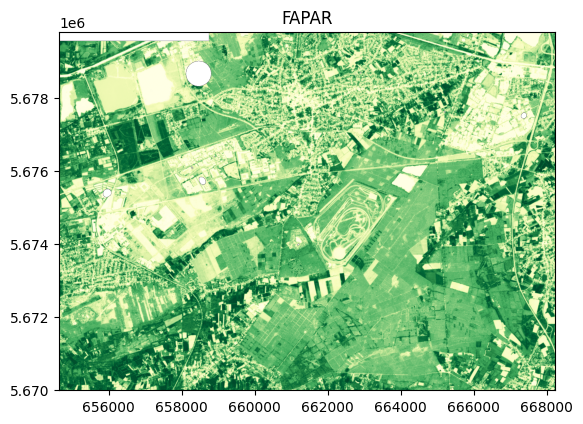

In [16]:
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt

tif_file = "data/fapar/openEO_2020-05-07Z.tif"

with rasterio.open(tif_file) as src:
    data = src.read(1)
    extent = rasterio.plot.plotting_extent(src)

plt.imshow(data, cmap="YlGn", extent=extent)
plt.title("FAPAR")
plt.show()
